# 1. 환경준비
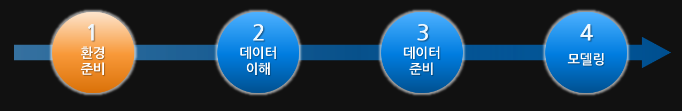

In [2]:
# sklearn 버전 확인
import sklearn
print(sklearn.__version__)   # 1.0.2

1.0.2


In [ ]:
# sklearn 버전 업그레이드
#!pip install scikit-learn --user --upgrade

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [34]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

---

# 2. 데이터 이해
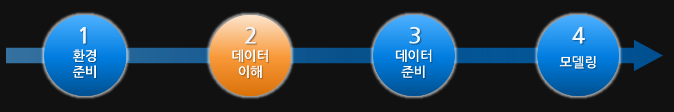

In [5]:
# 상위 행 확인
data.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5
5,28,NaN,14.9,66,5,6
6,23,299.0,8.6,65,5,7
7,19,99.0,13.8,59,5,8
8,8,19.0,20.1,61,5,9
9,20,194.0,8.6,69,5,10


In [6]:
# 하위 행 확인
data.tail(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
143,13,238.0,12.6,64,9,21
144,23,14.0,9.2,71,9,22
145,36,139.0,10.3,81,9,23
146,7,49.0,10.3,69,9,24
147,14,20.0,16.6,63,9,25
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [7]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [9]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [8]:
# 기술통계 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [10]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


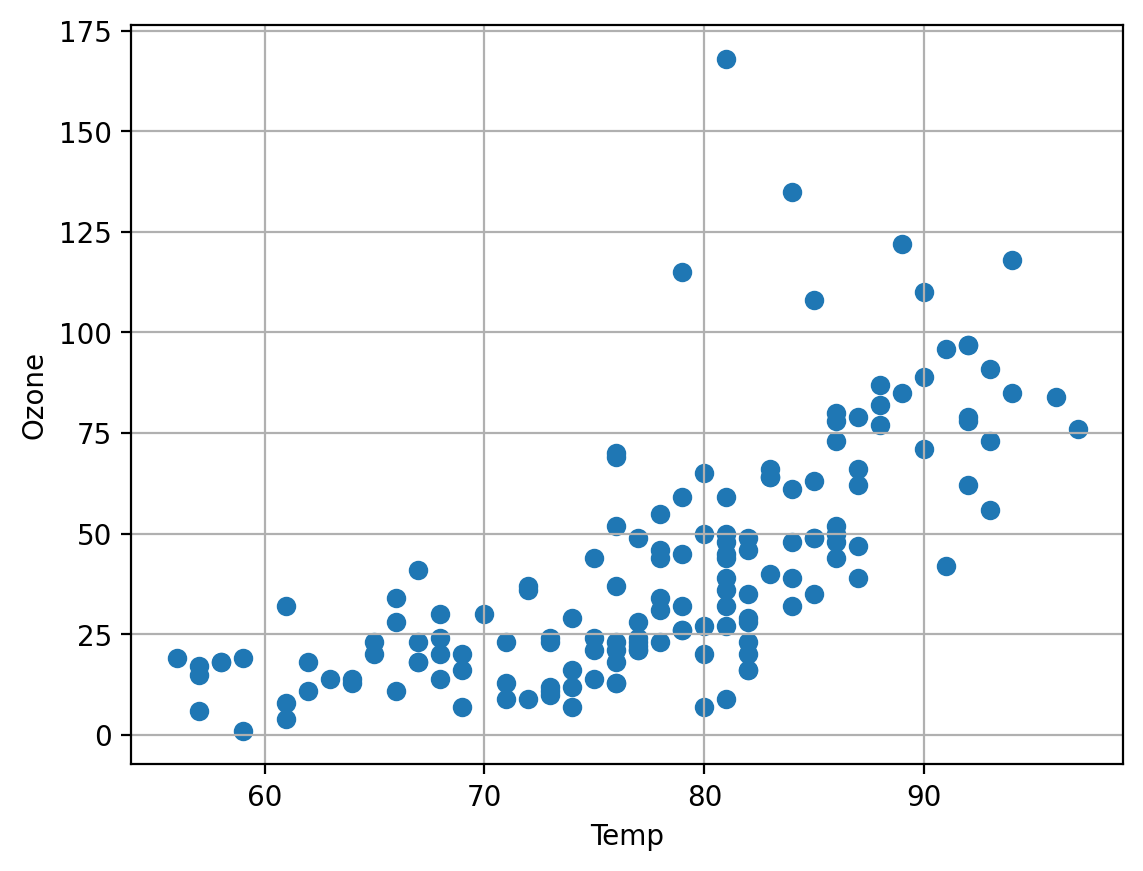

In [11]:
# 상관관계 시각화 Temp -> Ozone
plt.scatter(data['Temp'], data['Ozone'])
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.grid()
plt.show()


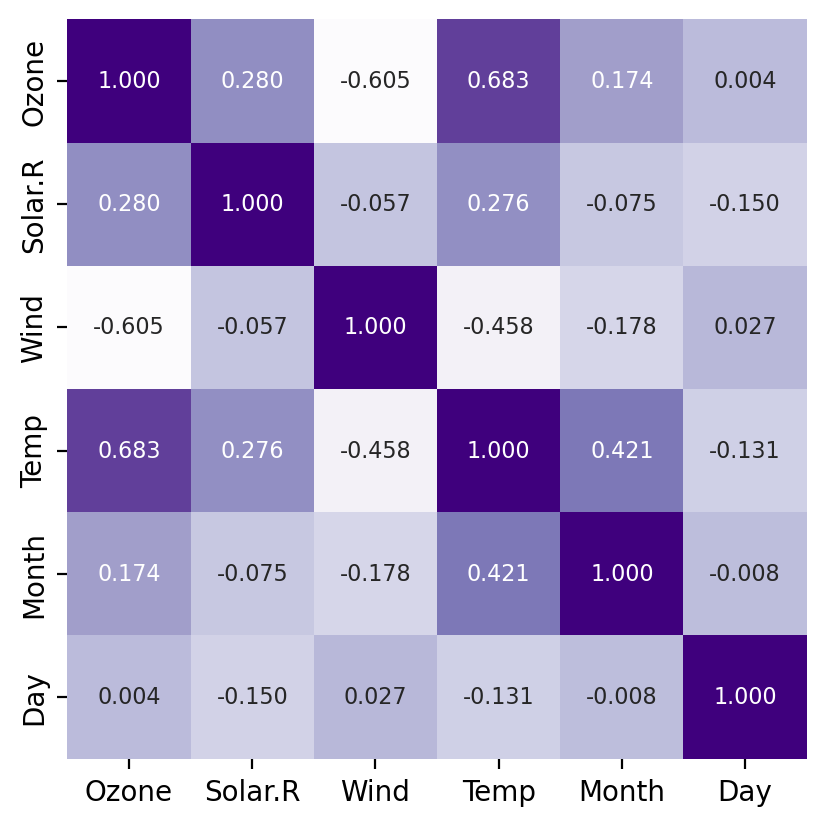

In [16]:
# 전체 변수 상관관계 시각화- 히트맵
sns.heatmap(data.corr(),
           annot=True,        # 숫자(상관계수) 표기
           cmap='Purples',    # 칼라맵
           cbar=False,         
           square=True,
           fmt='.3f',         # 숫자 포맷
           annot_kws={'size':8})  
plt.show()

---

# 3. 데이터 준비

### 1) 결측치 처리

In [35]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [36]:
# 직전 값으로 결측치 채우기. 
data.fillna(method='ffill', inplace=True)

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

### 2) 변수제거
- 분석에 필요없는 변수는 제거

In [37]:
# 변수제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)  # axis=1 열을 제거

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


### 3) x, y 분리
- x, y 분리
    - <span style="color:indianred">**target**</span> 변수를 명확하게 지정
    - target을 제외한 나머지 변수 데이터들을 <span style="color:indianred">**x**</span>로 선언
    - target 데이터는 <span style="color:indianred">**y**</span>로 선언
    - x는 데이터프레임, y는 시리즈가 됨
    - 이후 모든 작업은 x,y 대상으로 진행

In [38]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)  # target을 제외한 모든 변수를 x로 선언
y = data.loc[:, target]

### 4) 학습용, 평가용 데이터 분리

In [39]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3 으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3,
                                                   random_state=1)
                                # 학습을 위해 random_state=1옵션을 줌으로써 같은 결과를 보여줌

In [28]:
x_train[:10]

,Solar.R,Wind,Temp
132,259.0,9.7,73
73,175.0,14.9,81
18,322.0,11.5,68
48,37.0,9.2,65
4,NaN,14.3,56
45,322.0,11.5,79
75,48.0,14.3,80
39,291.0,13.8,90
36,264.0,14.3,79
118,153.0,5.7,88


---

# 4. 모델링 - 회귀1
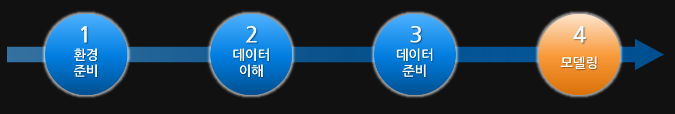


- 회귀 인지 분류인지 정확히 구분
- 회귀
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

##### `순서`
1단계: 불러오기   
2단계: 선언하기   
3단계: 학습하기   
4단계: 예측하기   
5단계: 평가하기

In [30]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [40]:
# 2단계: 선언하기
model = LinearRegression()

In [41]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [42]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [44]:
print(y_test.values[:10])
print(y_pred)

[24 18 97 47 34 22 66 18 69 27]
[ 13.84003067   5.82919112  81.93563027  58.41267418  50.86150737
  31.52971121  66.8083547   -8.56411529  50.2136544   39.13346172
 -14.60413643  53.82645974  68.0094895   45.41527772  12.25632276
  60.4071938   21.65999018  67.41049543  66.91478793  57.50384169
  51.79372077  79.74991031  49.9404284   60.91812412  23.46191876
  57.41325059  58.65243441  68.94853274  53.40993024  78.375367
  58.22404283   8.33408635   8.23572368  48.49589183  50.79945812
  41.6580547   33.75146592  84.27970623  43.9708495   32.53808251
  49.38870974  42.15404086  52.60468334 -26.88021757  72.53622368
  82.5609816 ]


In [45]:
# 5단계: 평가하기
mean_absolute_error(y_test, y_pred)

13.976843190385711

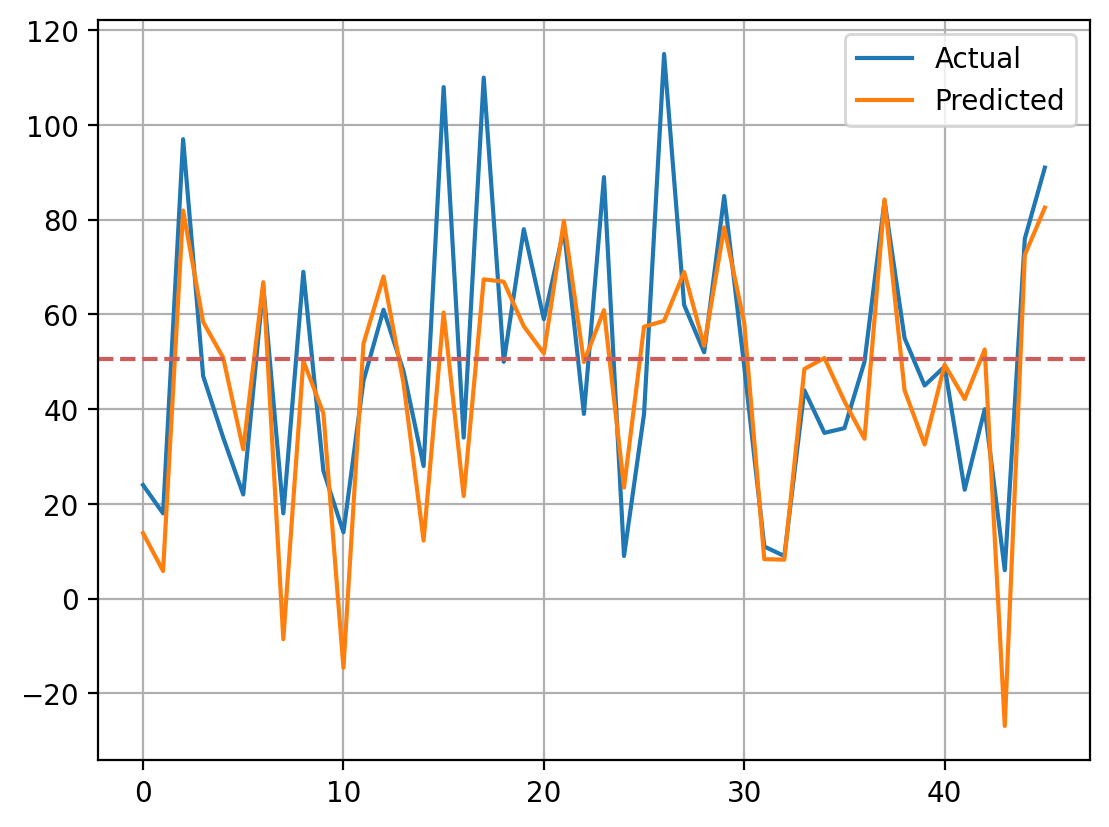

In [47]:
## 실제값과 예측값 시각화
mean_ozone = y_test.mean()

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.axhline(mean_ozone, color='indianred', linestyle='--')
plt.grid()
plt.legend()
plt.show()

$ $

$ $

---

# 5. 모델링 - 회귀2

In [ ]:
# 환경준비
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [48]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

**데이터 설명**

- crim: 자치시(Town)별 1인당 범죄율
- zn: 25,000 평방피트를 초과하는 거주지역 비율
- indus: 비소매상업지역이 점유하고 있는 토지 비율
- chas: 찰스강에 대한 더미 변수 (= 1 강 경계에 위치; 0 나머지)
- nox: 10ppm당 농축 일산화질소
- rm: 주택 1가구당 평균 방 개수
- age: 1940년 이전에 건축된 소유주택 비율
- dis: 5개 보스턴 직업센터까지 접근성 지수
- rad: 방사형 도로까지의 접근성 지수
- tax: 10,000달러 당 재산세율
- ptratio: 자치시(Town)별 학생/교사 비율
- black: 1000(Bk - 0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 의미
- lstat: 모집단 하위 계층의 비율(%)
- medv: 본인 소유 주택가격(중앙값) (단위:$1,000)

In [ ]:
# 데이터 이해
data.head()
data.tail()
data.info()
data.describe()
data.corr()

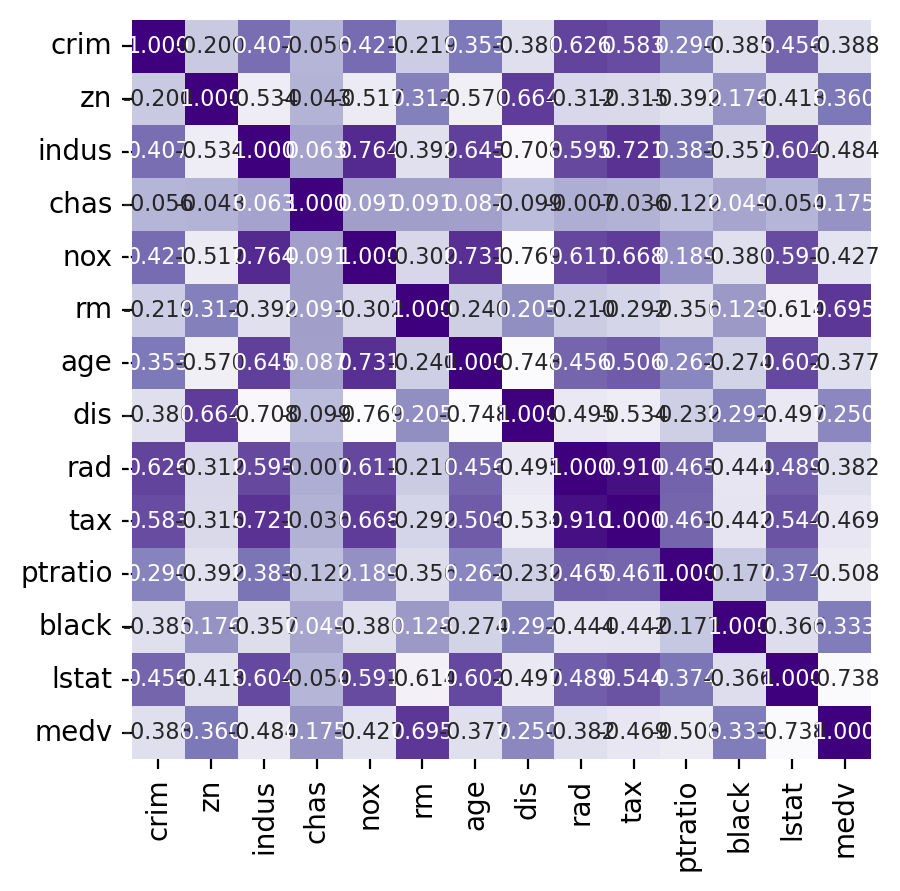

In [49]:
# 전체 변수 상관관계 시각화
sns.heatmap(data.corr(),
           annot=True,
           cmap='Purples',
           cbar=False,
           square=True,
           fmt='.3f',
           annot_kws={'size': 8})
plt.show()

In [50]:
# 데이터 준비

# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]


In [51]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3,
                                                   random_state=1)

In [52]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [53]:
# 2단계: 선언하기
model = LinearRegression()

In [54]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [55]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [56]:
# 5단계: 평가하기
mean_absolute_error(y_test, y_pred)

3.3446655035987582

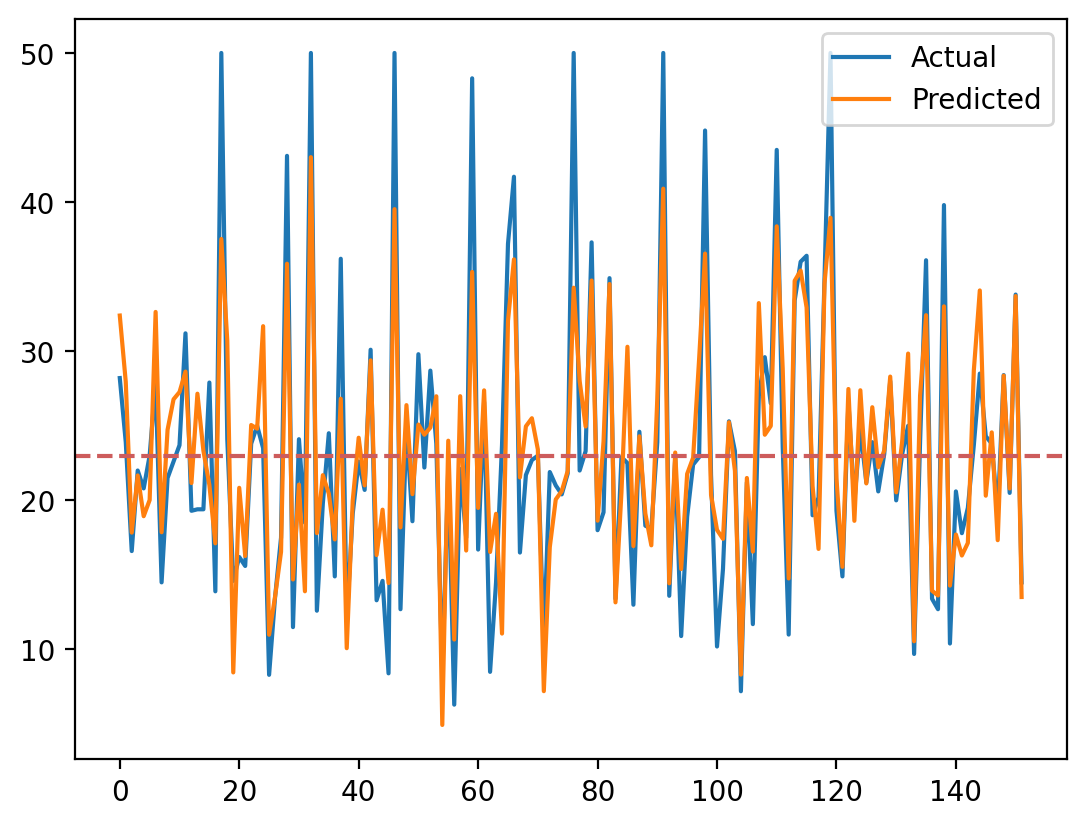

In [57]:
# 예측값과 실젯값 시각화 비교
mean = y_test.mean()
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.axhline(mean, color='indianred', linestyle='--')
plt.legend()
plt.show()

$ $

$ $

---

# 6. 모델링 - 분류(KNN)


In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [58]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

**데이터 설명**

- GRE: GRE Scores (out of 340)
- TOEFL: TOEFL Scores (out of 120)
- RANK: University Rating (out of 5)
- SOP: Statement of Purpose Strength (out of 5)
- LOR: Letter of Recommendation Strength (out of 5)
- GPA: Undergraduate GPA (out of 10)
- RESEARCH: Research Experience (either 0 or 1)
- ADMIT: Chance of Admit (either 0 or 1)

In [ ]:
# 데이터 이해
data.head()
data.tail()
data.info()
data.describe()
data.corr()

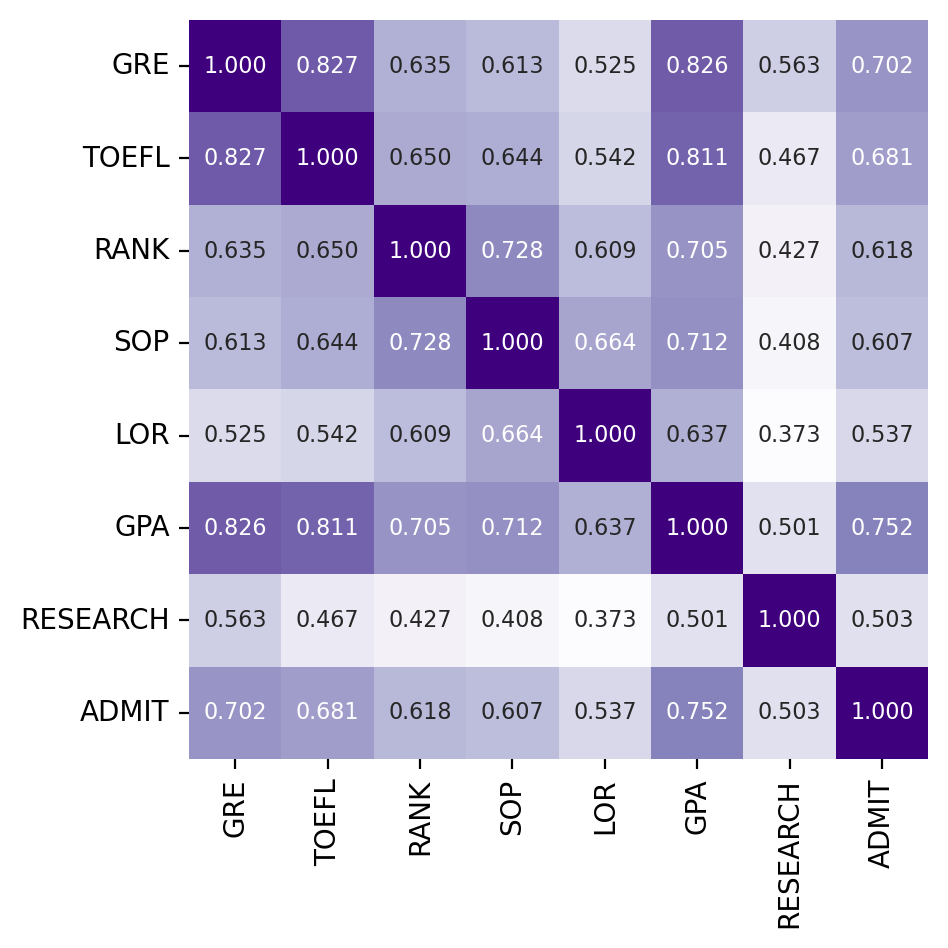

In [59]:
# 전체 변수 상관관계 시각화
sns.heatmap(data.corr(),
           annot=True,
           cmap='Purples',
           cbar=False,
           square=True,
           fmt='.3f',
           annot_kws={'size': 8})
plt.show()

In [61]:
# 데이터 분리
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]


In [62]:
# 학습용, 평가용 데이터 분리
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3,
                                                   random_state=1)

In [63]:
# # 모델링 - 분류
#     - 알고리즘: KNeighborsClassifier
#     - 평가방법: accuracy_score

# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score


In [64]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [65]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [67]:
# 5단계: 평가하기
accuracy_score(y_test, y_pred)

0.84

In [68]:
#### 테스트값과 예측값 비교해보기
print(y_test.values[:10])
print(y_pred[:10])

[0 1 1 0 1 0 1 0 1 0]
[0 0 1 0 1 0 0 1 1 0]


$ $

$ $

---

# 7. 모델링 - 분류(DecisionTreeClassifier)

In [69]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [70]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

**데이터 정보**

- Sepal.Length: 꽃받침의 길이   
- Sepal.Width: 꽃받침의 너비   
- Petal.Length: 꽃잎의 길이   
- Petal.Width: 꽃잎의 너비   

In [ ]:
# 데이터 이해
data.head()
data.tail()
data.info()
data.describe()
data.corr()

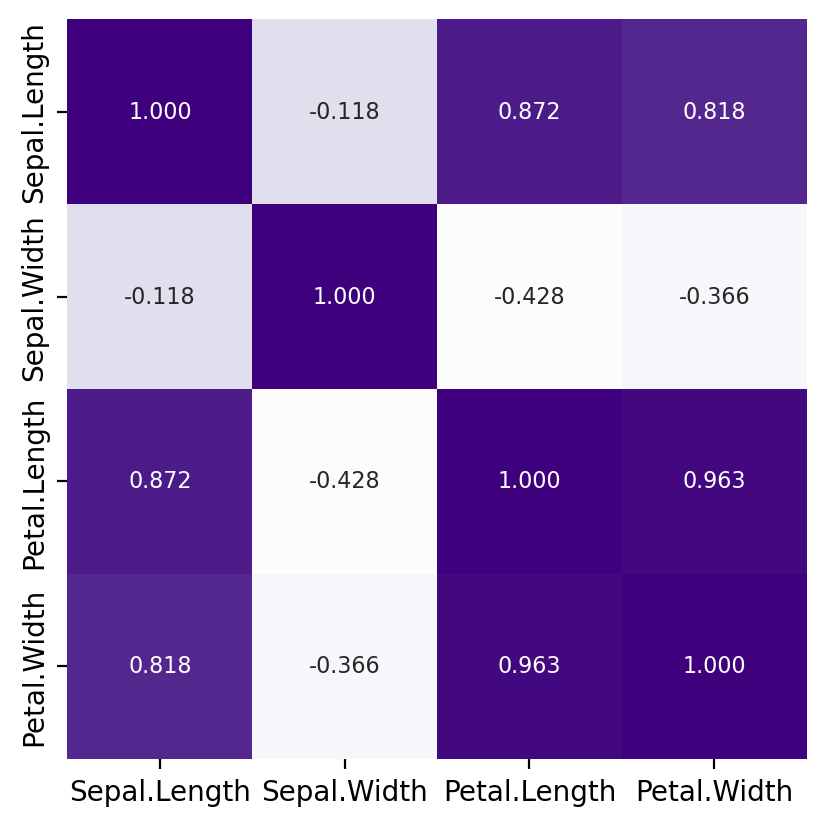

In [71]:
# 전체 변수 상관관계 시각화
sns.heatmap(data.corr(),
           annot=True,
           cmap='Purples',
           cbar=False,
           square=True,
           fmt='.3f',
           annot_kws={'size': 8})
plt.show()

In [72]:
# 데이터 준비
# target 확인
target = 'Species'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [73]:
# 학습용, 평가용 데이터 분리
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3,
                                                   random_state=1)

In [74]:
# 모델링 - 분류(DecisionTreeClassifier)
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [75]:
# 2단계: 선언하기
model = DecisionTreeClassifier()
                # max_depth=? 옵션으로 과대적합을 방지

In [76]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [78]:
# 5단계 평가하기
accuracy_score(y_test, y_pred)

0.9555555555555556

In [79]:
print(y_test.values[:10])
print(y_pred[:10])

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica']
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica']
